# Qiskit Tutorial

## Set up IBMQ account

In [1]:
from qiskit import IBMQ

In [2]:
IBMQ.save_account('4f88d5b74dbef53906def5c1a88b0369b247c5906cf940636894bdef965e58b194d505d7c062354a18b4243528bd7f790a1484325acf660eafadff6207ac3378')

/Users/wangchangwen/anaconda3/envs/quntum_com/lib/python3.7/site-packages/qiskit/providers/ibmq/credentials/configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '


In [3]:
IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

### Set provider (which kind of resources you can access)

In [4]:
provider = IBMQ.get_provider(hub = 'ibm-q')

In [5]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx4') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [6]:
backend = provider.get_backend('ibmq_qasm_simulator')

## Build Quantum Circuit

In [7]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 3) # (num_of_qubit, num_of_class_bit)
qc.draw()

In [8]:
from qiskit import QuantumRegister, ClassicalRegister
q_reg = QuantumRegister(3, name='qubit')
c0 = ClassicalRegister(1)
c1 = ClassicalRegister(1)
c2 = ClassicalRegister(1)
qc2 = QuantumCircuit(q_reg, c0, c1, c2)
qc2.draw()

### X-gate

In [9]:
# for integer parameter, use qc
qc.x([0, 2])
qc.draw()

In [10]:
# for register parameter, use qc2
qc2.x([q_reg[0], q_reg[2]])
qc2.draw()

### Y-Gate

In [11]:
# integer param
qc.y(1)
qc.draw()

In [12]:
# reg param
qc2.y(q_reg[1])
qc2.draw()

### Z-Gate
qc.z( qubit )
### Hadamard gate
qc.h( qubit )

### Let to qubit become tangled
cx(control_qubit, target_qubit)

In [13]:
qc.cx(0, 1)
qc.draw()

### Measurement
measure(qubit, classbit)

In [14]:
qc.measure([1, 2], [1, 2])
qc.draw()

### Conditional Operater
* Can only use on register mode

In [15]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc2 = QuantumCircuit(q, c)

qc2.measure(q[0], c)
# c_if(classbit, condition)
qc2.x(0).c_if(c, 0)
qc2.draw()

In [16]:
print(qc)

        ┌───┐        
q_0: |0>┤ X ├──■─────
        ├───┤┌─┴─┐┌─┐
q_1: |0>┤ Y ├┤ X ├┤M├
        ├───┤└┬─┬┘└╥┘
q_2: |0>┤ X ├─┤M├──╫─
        └───┘ └╥┘  ║ 
 c_0: 0 ═══════╬═══╬═
               ║   ║ 
 c_1: 0 ═══════╬═══╩═
               ║     
 c_2: 0 ═══════╩═════
                     


### Drawing choice
* text
* matplotlib => mpl
* LaTex

In [23]:
qc.draw(output='mpl', filename='circuit.png')
qc.draw(output='latex_source' )

'% \\documentclass[preview]{standalone}\n% If the image is too large to fit on this documentclass use\n\\documentclass[draft]{beamer}\n% img_width = 6, img_depth = 8\n\\usepackage[size=custom,height=10,width=13,scale=0.7]{beamerposter}\n% instead and customize the height and width (in cm) to fit.\n% Large images may run out of memory quickly.\n% To fix this use the LuaLaTeX compiler, which dynamically\n% allocates memory.\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{amsmath}\n\\pdfmapfile{+sansmathaccent.map}\n% \\usepackage[landscape]{geometry}\n% Comment out the above line if using the beamer documentclass.\n\\begin{document}\n\\begin{equation*}\n    \\Qcircuit @C=1.0em @R=0.0em @!R {\n\t \t\\lstick{ q_0 : \\ket{0} } & \\gate{X} & \\ctrl{1} & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\lstick{ q_1 : \\ket{0} } & \\gate{Y} & \\targ & \\meter & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\lstick{ q_2 : \\ket{0} } & \\gate{X} & \\meter & \\qw & \\qw & \\qw & \\qw & \\qw & \

### Execute
#### execute()
* circuit
* backend
* shots(default: 1024)
* optimization_level
    * 0: no opt
    * 1: light(default)
    * 2: heavy
    * 3: even heavy

In [22]:
qcs = []

In [24]:
# First
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure(range(2), range(2))
qcs.append(qc)

In [25]:
# Secend
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(1, 0)
qc.measure(range(2), range(2))
qcs.append(qc)

In [28]:
qcs[0].draw()

In [29]:
qcs[1].draw()

In [30]:
print(backend)

ibmq_qasm_simulator


In [31]:
from qiskit import execute

job = execute(qcs, backend=backend, shots = 1000)

In [37]:
# Check execute status
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [38]:
# get execute result
result = job.result()

In [43]:
count = result.get_counts(qcs[1])

### Data Analysis

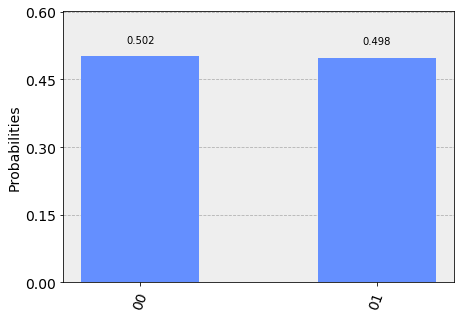

In [44]:
from qiskit.visualization import plot_histogram

plot_histogram(count)